<a href="https://colab.research.google.com/github/milepore/CS552/blob/main/CS552_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Question 1: Use the Penguins dataset open source dataset, focusing on two species only (e.g., Adelie and Gentoo), to compare the performance of Naive Bayes (Generative Model) and Logistic Regression (Discriminative Model).

In [ ]:
# import penguins into dataframe and select just 2 species

import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')
# Only select 2 species - I tried all the combinations, but Chinstrap and Adelie
# was the one that had the most error in prediction - and I thought the data
# would be more intersting this way.
df = df[df['species'].isin(['Chinstrap', 'Adelie'])]


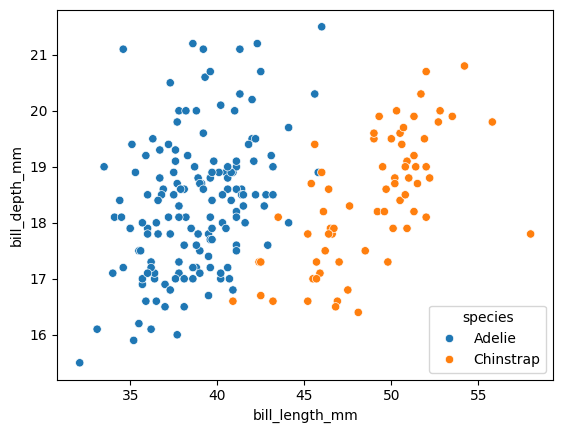

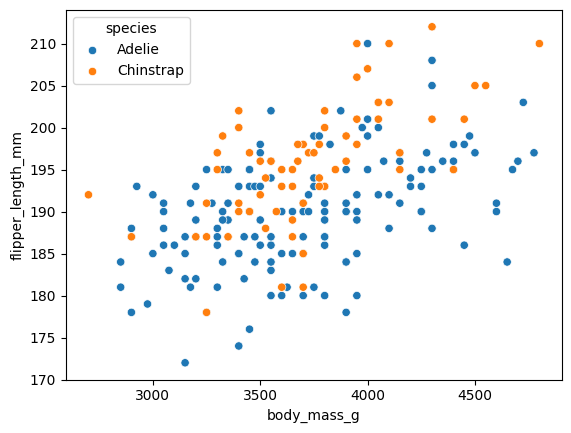

In [ ]:
# Visualize some of the data just to see what it would look like
import matplotlib.pyplot as plt

# Create the plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.show()

sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=df)
plt.show()


Ok, lets prep the data for training and testing, assuming 80/20 split and species is our target variable

In [ ]:
# split df into train and test (80/20)

from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']
# old random = 42
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=19) # 80/20 split, random_state for reproducibility
print(X_train_raw.shape, X_test_raw.shape)
print(y_train_raw.shape, y_test_raw.shape)


(176, 6) (44, 6)
(176,) (44,)


In [ ]:
# evaluate and report the accuracy of both the Naive Bayes and Logistic
# Regression models on the training and test datasets

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocess the data: handle missing values and encode categorical features
X_train = X_train_raw.dropna().copy()
y_train = y_train_raw[X_train.index].copy()  # Align y_train with X_train after dropping rows
X_test = X_test_raw.dropna().copy()
y_test = y_test_raw[X_test.index].copy()

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Scale numerical features
numerical_cols = X_train.select_dtypes(include=['number']).columns
print(numerical_cols)
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Encode categorical features (if any remain after dropping rows with NaN values)
categorical_cols = X_train.select_dtypes(exclude=['number']).columns
print(categorical_cols)
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)

# Make predictions
nb_train_preds = nb_model.predict(X_train)
nb_test_preds = nb_model.predict(X_test)

lr_train_preds = lr_model.predict(X_train)
lr_test_preds = lr_model.predict(X_test)

# Evaluate the models
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)

lr_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)

rdf = pd.DataFrame({'y_true': y_test, 'nb_test_preds': nb_test_preds, 'lr_test_preds': lr_test_preds})
rdf['equal'] = rdf['nb_test_preds'] == rdf['lr_test_preds']
#print(rdf)

print("Naive Bayes:")
print(f"Training accuracy: {nb_train_accuracy}")
print(f"Test accuracy: {nb_test_accuracy}")

print("\nLogistic Regression:")
print(f"Training accuracy: {lr_train_accuracy}")
print(f"Test accuracy: {lr_test_accuracy}")

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
Index(['island', 'sex'], dtype='object')
Naive Bayes:
Training accuracy: 0.7588235294117647
Test accuracy: 0.75

Logistic Regression:
Training accuracy: 0.9823529411764705
Test accuracy: 1.0


In [ ]:
# Get probability estimates for the test set
nb_probabilities = nb_model.predict_proba(X_test)

# Display the probability estimates
#for i, prob in enumerate(nb_probabilities):
#    print(f"Sample NB {i+1}: Class 0 Probability = {prob[0]:.4f}, Class 1 Probability = {prob[1]:.4f}")

# Get probability estimates for the test set
lr_probabilities = lr_model.predict_proba(X_test)

# Display the probability estimates
#for i, prob in enumerate(lr_probabilities):
#    print(f"Sample LR {i+1}: Class 0 Probability = {prob[0]:.4f}, Class 1 Probability = {prob[1]:.4f}")

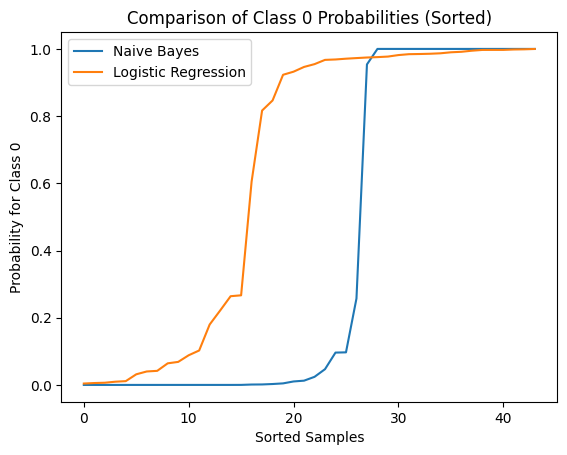

In [ ]:
# plot both the lr and nb probability for class 0 sorted low to high
# just to get a feel for what the models look like

import matplotlib.pyplot as plt

# Extract class 0 probabilities for both models
nb_class0_probs = nb_probabilities[:, 0]
lr_class0_probs = lr_probabilities[:, 0]

# Sort the probabilities and their indices
sorted_indices_nb = sorted(range(len(nb_class0_probs)), key=lambda k: nb_class0_probs[k])
sorted_nb_class0_probs = [nb_class0_probs[i] for i in sorted_indices_nb]

sorted_indices_lr = sorted(range(len(lr_class0_probs)), key=lambda k: lr_class0_probs[k])
sorted_lr_class0_probs = [lr_class0_probs[i] for i in sorted_indices_lr]

# Create the plot
plt.plot(sorted_nb_class0_probs, label='Naive Bayes')
plt.plot(sorted_lr_class0_probs, label='Logistic Regression')
plt.xlabel('Sorted Samples')
plt.ylabel('Probability for Class 0')
plt.title('Comparison of Class 0 Probabilities (Sorted)')
plt.legend()
plt.show()

### Answer 1: Compare the performance of these models

The Naive Bayes model has a very sharp cutoff, and might do a better job distinguishing between species or data that are clearly delineated across multiple dimensions.  For this particular dataset, with these species, it seems like there isn't as clear a difference, so Logistic Regression provies significantly more accuracy.

Interestinglu the Naive Bayes model doesn't even get all its training data correct.

As mentioned in the reading, Logistic Regression seems to be better for classification even given this simple data.

## Question 2: AUC Comparison

In [ ]:
# Calculate the AUC for both Naive Bayes and Logistic Regression on the training and test datasets.

from sklearn.metrics import roc_auc_score

# Assuming y_train and y_test are already label encoded (0 and 1)
# If not, you need to convert them using LabelBinarizer or similar

# Calculate AUC for Naive Bayes
nb_train_auc = roc_auc_score(y_train, nb_model.predict_proba(X_train)[:, 1])
nb_test_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

# Calculate AUC for Logistic Regression
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print("\nNaive Bayes:")
print(f"Training AUC: {nb_train_auc}")
print(f"Test AUC: {nb_test_auc}")

print("\nLogistic Regression:")
print(f"Training AUC: {lr_train_auc}")
print(f"Test AUC: {lr_test_auc}")


Naive Bayes:
Training AUC: 0.9942959582790092
Test AUC: 0.9955357142857142

Logistic Regression:
Training AUC: 0.9996740547588006
Test AUC: 1.0


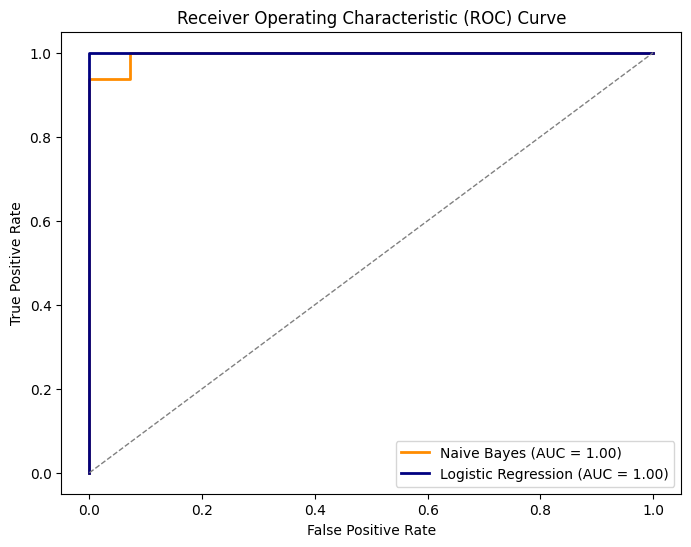

In [ ]:
# prompt: plot the roc curve for both models

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='navy', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Answer 2: Provide insights into which model is more effective based on the AUC metric.

Interestingly the AUC metric for our test data in both models is the same.  Even though the AUC is different on the training data, it must be just an artifact that we end up with the same AUC for the test data.

But that means that they are similar in terms of overall error.

Interestingly I had used a different random seed that produced exaclty the same AUC curve in this case.  As you can see by this particular curve, the LR model is slightly more accurate, but only by a little - they are both near perfect.

## Question 3: Lift and Gain Charts

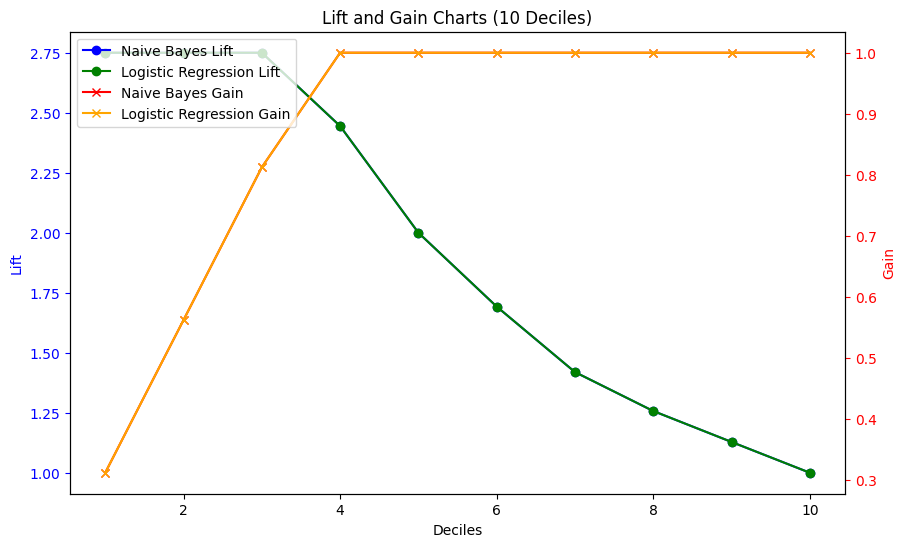

In [ ]:
# generate Lift and Gain charts for both Naive Bayes and Logistic Regression using 10 deciles.
# • Use a dual y-axis plot with deciles on the x-axis, and Lift and Gain on the y-axis.

import numpy as np

def calculate_gains_lifts(y_true, y_pred_proba, n_deciles=10):
    df_gl = pd.DataFrame({'y_true': y_true, 'y_pred_proba': y_pred_proba})
    df_gl = df_gl.sort_values('y_pred_proba', ascending=False)
    df_gl['order'] = range(1, len(df_gl) + 1) # since we dont' have enough descrete values, we need to slice using another value
    df_gl['decile'] = pd.qcut(df_gl['order'], n_deciles, labels=False)

    gain = []
    lift = []
    cum_pos = 0
    cum_total = 0
    for i in range(n_deciles):
        decile_data = df_gl[df_gl['decile'] == i]
        qn_positives = decile_data['y_true'].sum()
        qn_total = len(decile_data)
        cum_pos += qn_positives
        cum_total += qn_total
        n_positives = cum_pos
        n_total = cum_total

        gain.append(cum_pos/ df_gl['y_true'].sum())
        lift.append((cum_pos) / (cum_total * df_gl['y_true'].sum() / len(df_gl)))

    return gain, lift

nb_proba = nb_model.predict_proba(X_test)
lr_proba = lr_model.predict_proba(X_test)
nb_test_gain, nb_test_lift = calculate_gains_lifts(y_test, nb_proba[:, 1])
lr_test_gain, lr_test_lift = calculate_gains_lifts(y_test, lr_proba[:, 1])

deciles = range(1, 11)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(deciles, nb_test_lift, marker='o', label='Naive Bayes Lift', color='blue')
ax1.plot(deciles, lr_test_lift, marker='o', label='Logistic Regression Lift', color='green')

ax1.set_xlabel('Deciles')
ax1.set_ylabel('Lift', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(deciles, nb_test_gain, marker='x', label='Naive Bayes Gain', color='red')
ax2.plot(deciles, lr_test_gain, marker='x', label='Logistic Regression Gain', color='orange')

ax2.set_ylabel('Gain', color='red')
ax2.tick_params('y', colors='red')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Lift and Gain Charts (10 Deciles)')
plt.show()

### Answer 3: Evaluate Lift/Gain

It seems like at the decile level, the overall ordering of predictions are of the same accuracy in this case.  We are talking about a limited set of data though.

So when it comes to prioritization, these are exactly the same with this dataset.

## Question 4: Model Performance Comparison

Overall the two models seems to perform well for the test data.

When it comes to AUC and Accuracy though the LR model seems to perform slightly better - with this particular dataset it can give an AUC of 1.0 (perfect).

From an ordering overall though they perform the same.

For this dataset, it seems that the classification is pretty obvious - it actually took a bit of work to find a random seed and specices split that showed a difference at all between the various paramters.  When looking at other species it was super-obvious about how they could be classified.

I'm also guessing that one of the reasons that NB performs poorly in some of these conditions is that it is assuming that the paraetmers are independant of each other.  My guess is that (for example) a penguin's bill length is related to its weight - and the NP classifier would miss that.

## Question 5: Performance on a Complex Dataset

Extend your analysis by applying both Naive Bayes and Logistic Regression to a more complex dataset,
such as MNIST (handwritten digits).

In [ ]:
# import the MNIST dataset

from tensorflow import keras

(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# evaluate and report the accuracy of both the Naive Bayes and Logistic
# Regression models on the training and test datasets

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

#nomralize the pixel values to 0-1
X_train = X_train_raw/255
X_test = X_test_raw/255

y_train = y_train_raw
y_test = y_test_raw

# now flaten each value
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_flattened, y_train)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter
lr_model.fit(X_train_flattened, y_train)

# Make predictions
nb_train_preds = nb_model.predict(X_train_flattened)
nb_test_preds = nb_model.predict(X_test_flattened)

lr_train_preds = lr_model.predict(X_train_flattened)
lr_test_preds = lr_model.predict(X_test_flattened)

# Evaluate the models
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)

lr_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)

rdf = pd.DataFrame({'y_true': y_test, 'nb_test_preds': nb_test_preds, 'lr_test_preds': lr_test_preds})
rdf['equal'] = rdf['nb_test_preds'] == rdf['lr_test_preds']
#print(rdf)

print("Naive Bayes:")
print(f"Training accuracy: {nb_train_accuracy}")
print(f"Test accuracy: {nb_test_accuracy}")

print("\nLogistic Regression:")
print(f"Training accuracy: {lr_train_accuracy}")
print(f"Test accuracy: {lr_test_accuracy}")

Naive Bayes:
Training accuracy: 0.5649
Test accuracy: 0.5558

Logistic Regression:
Training accuracy: 0.9388833333333333
Test accuracy: 0.9258


We show a big difference here between the accuracy.  Again - I'm guessing that a huge part of it in this dataset has to do with how the pixels are actually related to each other.  We are training on a pretty simple set of dimensions (just the pixel values of each pixel)

In [ ]:
# Get probability estimates for the test set
nb_probabilities = nb_model.predict_proba(X_test_flattened)

# Display the probability estimates
#for i, prob in enumerate(nb_probabilities):
#    print(f"Sample NB {i+1}: Class 0 Probability = {prob[0]:.4f}, Class 1 Probability = {prob[1]:.4f}")

# Get probability estimates for the test set
lr_probabilities = lr_model.predict_proba(X_test_flattened)


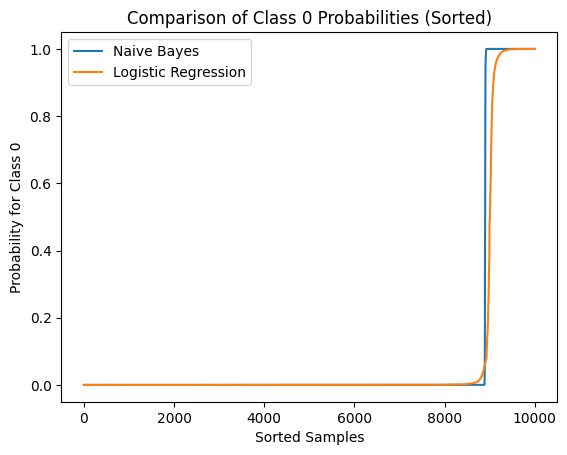

In [ ]:
# plot both the lr and nb probability for class 0 sorted low to high
# just to get a feel for what the models look like

import matplotlib.pyplot as plt

# Extract class 0 probabilities for both models
nb_class0_probs = nb_probabilities[:, 0]
lr_class0_probs = lr_probabilities[:, 0]

# Sort the probabilities and their indices
sorted_indices_nb = sorted(range(len(nb_class0_probs)), key=lambda k: nb_class0_probs[k])
sorted_nb_class0_probs = [nb_class0_probs[i] for i in sorted_indices_nb]

sorted_indices_lr = sorted(range(len(lr_class0_probs)), key=lambda k: lr_class0_probs[k])
sorted_lr_class0_probs = [lr_class0_probs[i] for i in sorted_indices_lr]

# Create the plot
plt.plot(sorted_nb_class0_probs, label='Naive Bayes')
plt.plot(sorted_lr_class0_probs, label='Logistic Regression')
plt.xlabel('Sorted Samples')
plt.ylabel('Probability for Class 0')
plt.title('Comparison of Class 0 Probabilities (Sorted)')
plt.legend()
plt.show()

In [ ]:
# Calculate the AUC for both Naive Bayes and Logistic Regression on the training and test datasets.

from sklearn.metrics import roc_auc_score

# Assuming y_train and y_test are already label encoded (0 and 1)
# If not, you need to convert them using LabelBinarizer or similar

# Calculate AUC for Naive Bayes
nb_train_auc = roc_auc_score(y_train, nb_model.predict_proba(X_train_flattened), multi_class='ovo')
nb_test_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test_flattened), multi_class='ovo')

# Calculate AUC for Logistic Regression
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train_flattened), multi_class='ovo')
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_flattened), multi_class='ovo')

print("\nNaive Bayes:")
print(f"Training AUC: {nb_train_auc}")
print(f"Test AUC: {nb_test_auc}")

print("\nLogistic Regression:")
print(f"Training AUC: {lr_train_auc}")
print(f"Test AUC: {lr_test_auc}")


Naive Bayes:
Training AUC: 0.9314093672045382
Test AUC: 0.9312100473192911

Logistic Regression:
Training AUC: 0.9957011500304073
Test AUC: 0.9938190378960954


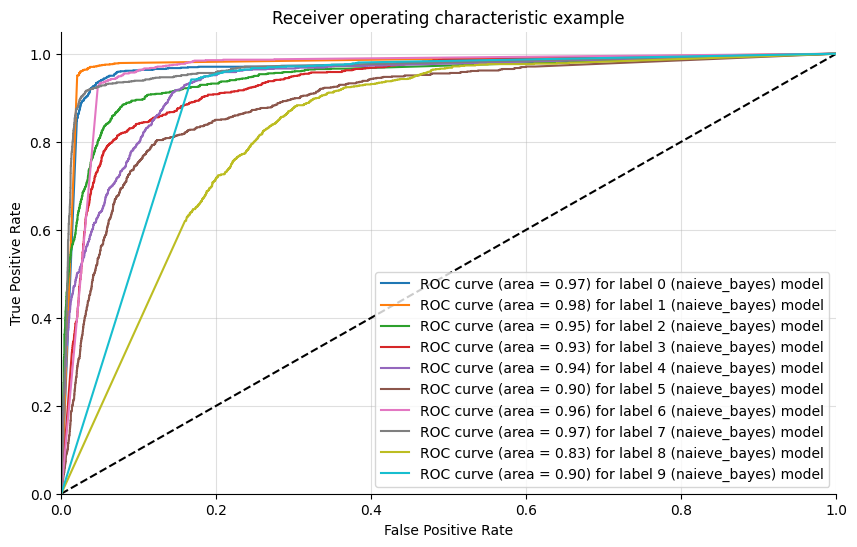

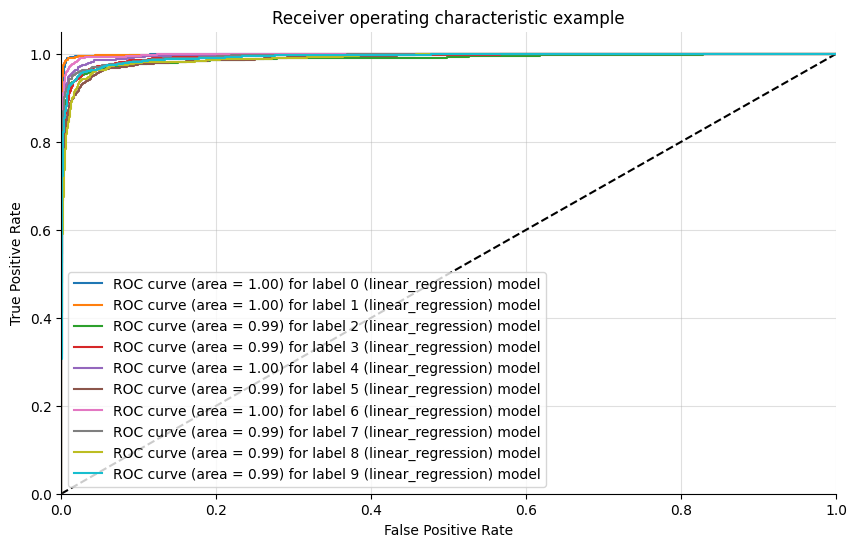

In [ ]:
# plot the roc curve for both models

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multiclass_roc(model, label, X_test, y_test, n_classes, figsize=(10, 6)):
    y_score = model.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i (%s) model' % (roc_auc[i], i, label))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(nb_model, "naieve_bayes", X_test_flattened, y_test, n_classes=10, figsize=(10,6))
plot_multiclass_roc(lr_model, "linear_regression", X_test_flattened, y_test, n_classes=10, figsize=(10,6))


Again - here our ROC curve is very different - with the LR showing much better accuracy than the NB model - which shows in the graph.

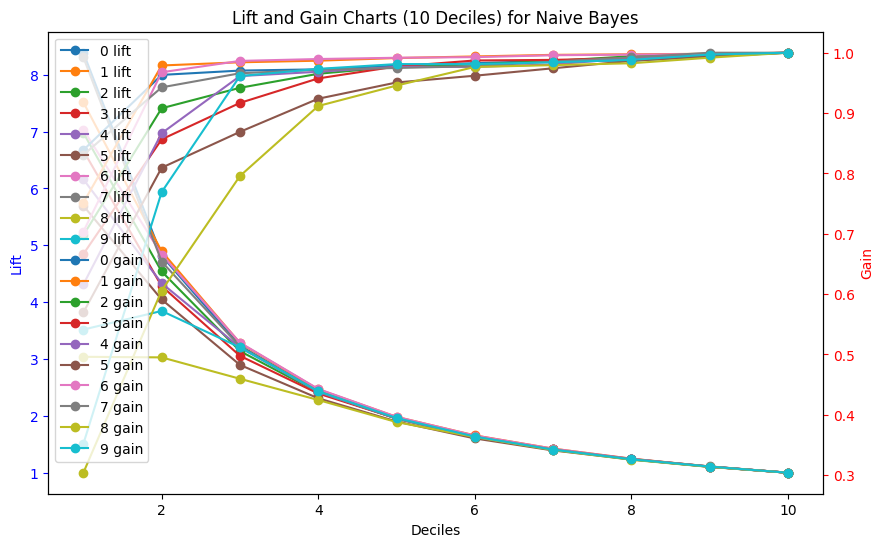

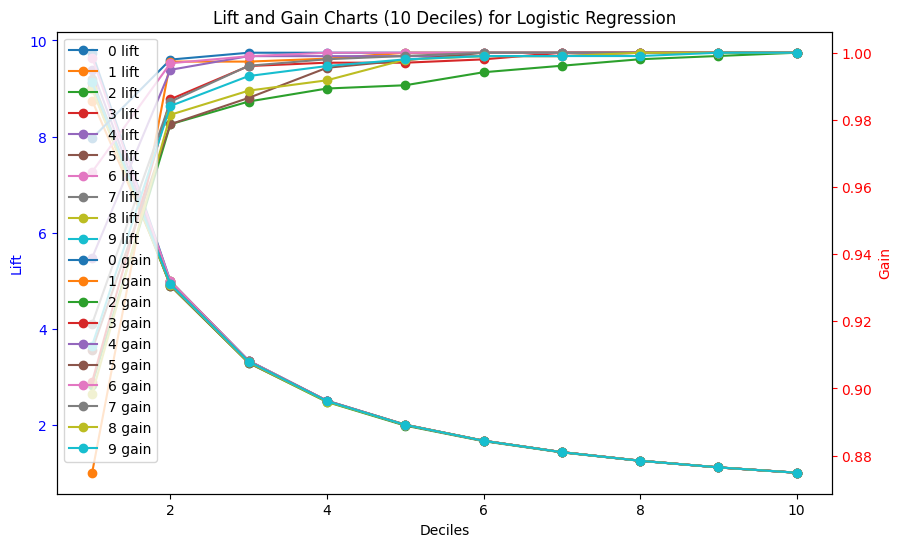

In [ ]:
import numpy as np

def calculate_gains_lifts(y_true, y_pred_proba, num_classes, n_deciles=10):
    gains = dict()
    lifts = dict()
    y_test_dummies = np.unique(y_true)

    for c in range(num_classes):
      gain=[]
      lift=[]
      classValue = y_test_dummies[c]
      df_gl = pd.DataFrame({'y': y_true, 'y_pred_proba': y_pred_proba[:,c]})
      df_gl['y_true'] = df_gl['y'] == classValue
      df_gl = df_gl.sort_values('y_pred_proba', ascending=False)
      df_gl['order'] = range(1, len(df_gl) + 1) # since we dont' have enough descrete values, we need to slice using another value
      df_gl['decile'] = pd.qcut(df_gl['order'], n_deciles, labels=False)
      gl_positives = len(df_gl[df_gl.y_true == True])

      cum_positives = 0
      cum_total = 0
      for i in range(n_deciles):
          decile_data = df_gl[df_gl['decile'] == i]
          qn_positives = len(decile_data[decile_data['y_true'] == True])
          qn_total = len(decile_data)
          cum_positives += qn_positives
          cum_total += qn_total

          gain.append(cum_positives/ gl_positives)
          lift.append((cum_positives) / (cum_total * gl_positives / len(df_gl)))

      gains[classValue] = gain
      lifts[classValue] = lift

    return gains, lifts

nb_proba = nb_model.predict_proba(X_test_flattened)
lr_proba = lr_model.predict_proba(X_test_flattened)
nb_test_gains, nb_test_lifts = calculate_gains_lifts(y_test, nb_proba, 10, 10)
lr_test_gains, lr_test_lifts = calculate_gains_lifts(y_test, lr_proba, 10, 10)

def plot_gain_lift(gains, lifts, label):
    deciles = range(1, 11)

    fig, ax1 = plt.subplots(figsize=(10, 6))
    for i in range(10):
        ax1.plot(deciles, lifts[i], marker='o', label='%i lift'%(i))


    ax1.set_xlabel('Deciles')
    ax1.set_ylabel('Lift', color='blue')
    ax1.tick_params('y', colors='blue')

    ax2 = ax1.twinx()
    for i in range(10):
        ax2.plot(deciles, gains[i], marker='o', label='%i gain'%(i))

    ax2.set_ylabel('Gain', color='red')
    ax2.tick_params('y', colors='red')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.title('Lift and Gain Charts (10 Deciles) for %s'%label)
    plt.show()

plot_gain_lift(nb_test_gains, nb_test_lifts, "Naive Bayes")
plot_gain_lift(lr_test_gains, lr_test_lifts, "Logistic Regression")



We see similar trends in the gain/lift charts that we've been seeing in the other models.  The LR model predicts ordering much better than the NB model.

Again - I'm guessing that this has to do with the fact that we are using data with many dimensions (the saturation value of each pixel) and that the values of each pixel are not completely indepenant.  The LR model can model those relationships, while the NB one can't.

That said, we could probably figure out how to use the NB one to generate new exmamples of each of the digits, while the LR one can't do that.